In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

In [62]:
def random_n_numbers(n, mini, maxi):
    random_numbers = []
    for i in range(n):
        k = np.random.randint(mini,maxi)
        random_numbers.append(k)
    return random_numbers
def draw_few_images(X, numbers):
    for el in numbers:
        K = X[el,::].reshape(64,64)
        plt.imshow(K, cmap=plt.cm.gray)
        plt.show()
        

In [63]:
olivetti = fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True)
olivetti_data = olivetti.data

In [65]:
random_numbers = random_n_numbers(5,0,olivetti_data.shape[0])


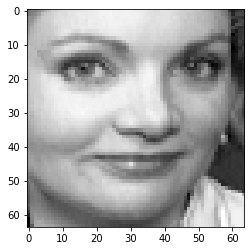

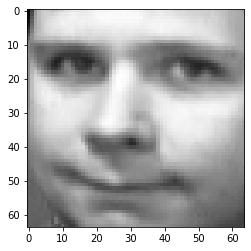

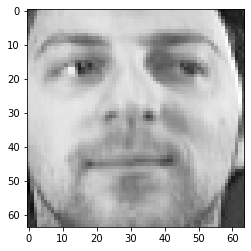

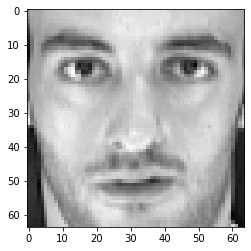

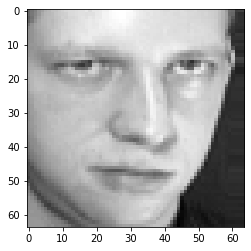

In [66]:
draw_few_images(olivetti_data,random_numbers)

In [27]:
from sklearn.decomposition import PCA
X = olivetti.data
pca = PCA()
pca.fit(X)

PCA()

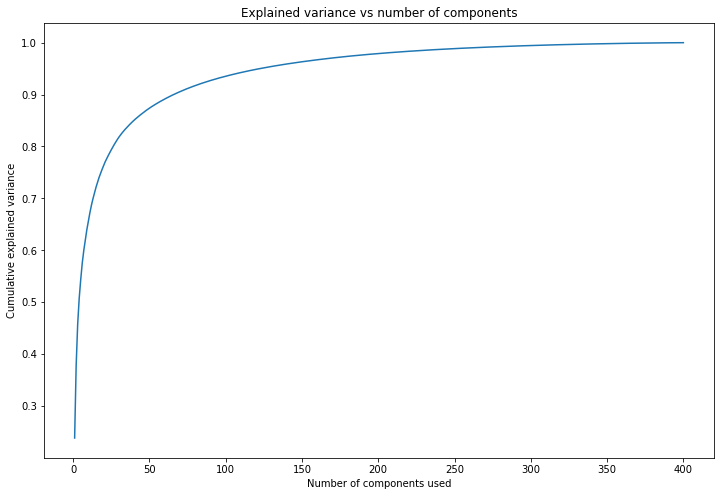

In [28]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components used')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.show()


Załóżmy, że chcemy mieć wyjaśnione 90 % wariancji.

In [29]:

pca1 = PCA(n_components = 0.9)
pca1.fit(X)
print(f"Explained variance ratio: {sum(pca1.explained_variance_ratio_)}")
print(f"Number of components: {len(pca1.explained_variance_ratio_)}")

Explained variance ratio: 0.9002452021231875
Number of components: 66


In [32]:
X_compressed = pca1.fit_transform(X)

In [42]:
print(f"Stopien kompresji: {np.round(X[0].shape[0] / X_compressed[0].shape[0],2)}")

Stopien kompresji: 62.06


In [67]:
X_compressed_inverse = pca1.inverse_transform(X_compressed)

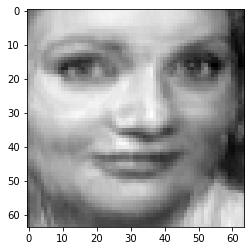

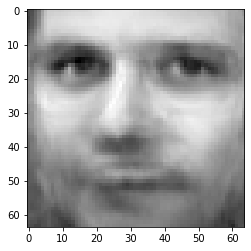

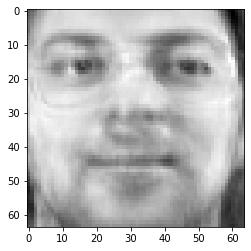

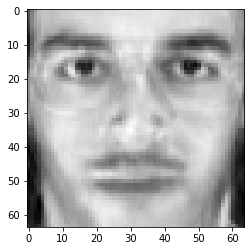

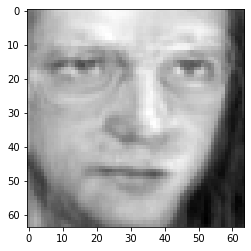

In [68]:
draw_few_images(X_compressed_inverse, random_numbers)

In [119]:
def rmse(X_true, X_compressed):
    return np.sqrt(np.sum(np.power(X_true - X_compressed, 2)) / X_true.size )
def characteristics(X, X_compressed_inverse):
    RMSE_images = []
    for i in range(X.shape[0]):
        RMSE_images.append(rmse(X[i],X_compressed_inverse[i]))
    
    plt.hist(RMSE_images)
    plt.show()
    print(f"Sredni blad {np.mean(RMSE_images)}")
    print(f"Srednie odchylenie {np.std(RMSE_images)}")
    
    

Sredni blad 0.043339718747111344
Srednie odchylenie 0.00661123564270504


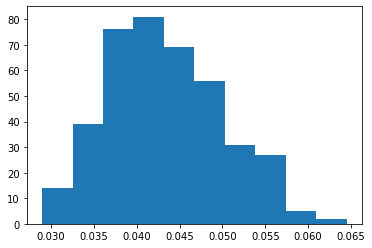

In [117]:
characteristics(X, X_compressed_inverse)

Obrót o 90 stopni i 180 stopni

In [111]:
from skimage import transform

rotate90 = []
    
for i in range(X.shape[0]):
    rotate90.append(transform.rotate(X[i].reshape(64, 64), 90).reshape(1, 4096))
rotate90 = np.array(rotate90)
rotate90 = rotate90[:,0,:]

In [112]:
from skimage import transform

rotate180 = []
    
for i in range(X.shape[0]):
    rotate180.append(transform.rotate(X[i].reshape(64, 64), 180).reshape(1, 4096))
rotate180 = np.array(rotate180)
rotate180 = rotate180[:,0,:]

Jeszcze raz wyniki wyjsciowe


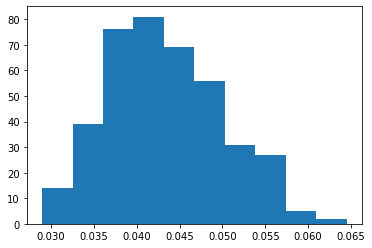

Sredni blad 0.043339718747111344
Srednie odchylenie 0.00661123564270504
Wyniki dla obrotu o 90 stopni


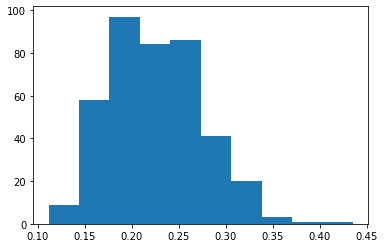

Sredni blad 0.22538471738880708
Srednie odchylenie 0.04921684696986018
WYniki dla obrotu o 180 stopni


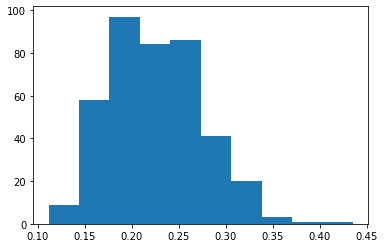

Sredni blad 0.2253847126524965
Srednie odchylenie 0.04921684581009474


In [128]:
X_90_compressed = pca1.fit_transform(rotate90)
X_180_compressed = pca1.fit_transform(rotate180)

X_90_inverse = pca1.inverse_transform(X_90_compressed)
X_180_inverse = pca1.inverse_transform(X_180_compressed)
print("Jeszcze raz wyniki wyjsciowe")
characteristics(X, X_compressed_inverse)
print("Wyniki dla obrotu o 90 stopni")
characteristics(X, X_90_inverse)
print("WYniki dla obrotu o 180 stopni")
characteristics(X, X_180_inverse)


Widzimy, że błąd dla zdjęć obróconych jest innego rzędu wielkości. Dzięki temu takie anomalie jak obroty mogą być wykrywane przez PCA